In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
## Tomato name dictionary 
names = {'0' : 'Kumato' , '1' : 'Beefsteak'  , '2' : 'Tigerella' , '3' :'Roma' , '4' : 'Japanese black trifella' , '5' : 'yellow pear' , '6' : 'sun gold', '7' : 'green zebra' , '8' : 'Cherokee purple' , '9' : 'Oxheart' , '10' : 'blue berries' , '11' : 'San Marzano' , '12' : 'Banana legs' , '13' : 'German orange strawberry' , '14' : 'Super sweet 100'}

In [ ]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    img_class = []
    for filename in os.listdir(folder):
        img_class.append(int(filename[:2]) -1)
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img , (224,224))
        if img is not None:
            images.append(img)
    return images, img_class

images , image_class = load_images_from_folder("../input/tomato-cultivars")

In [ ]:
type(images) , type(image_class)

(list, list)

In [ ]:
images = np.array(images)
images.shape

(776, 224, 224, 3)

In [ ]:
image_class = np.array(image_class)
image_class.shape

(776,)

In [ ]:
## Using sklearn train_test_split 
train, x_val_test, y_train, y_val_test = train_test_split(images, image_class , stratify = image_class, test_size = 0.25 , random_state = 32)
val, test, y_val, y_test = train_test_split(x_val_test, y_val_test , stratify = y_val_test, test_size = 0.4)

print("train size :{}".format(train.shape))
print("y_train size :{}".format(y_train.shape))
##
print("val size :{}".format(val.shape))
print("y_val size :{}".format(y_val.shape))
##
print("test size :{}".format(test.shape))
print("y_test size :{}".format(y_test.shape))

train size :(582, 224, 224, 3)
y_train size :(582,)
val size :(116, 224, 224, 3)
y_val size :(116,)
test size :(78, 224, 224, 3)
y_test size :(78,)


In [ ]:
## number of classes in train data 
pd.Series(y_train).value_counts()

1     51
2     50
5     46
12    45
7     43
14    41
11    41
3     41
0     37
10    35
6     33
8     32
9     32
4     29
13    26
dtype: int64

In [ ]:
## no of classes in validation data 
pd.Series(y_val).value_counts()

1     10
2     10
5     10
12     9
11     8
14     8
7      8
3      8
6      7
0      7
9      7
10     7
8      7
4      5
13     5
dtype: int64

In [ ]:
## no of classes in test data 
pd.Series(y_test).value_counts()

1     7
14    6
7     6
2     6
5     6
12    6
11    6
10    5
0     5
3     5
6     4
4     4
8     4
9     4
13    4
dtype: int64

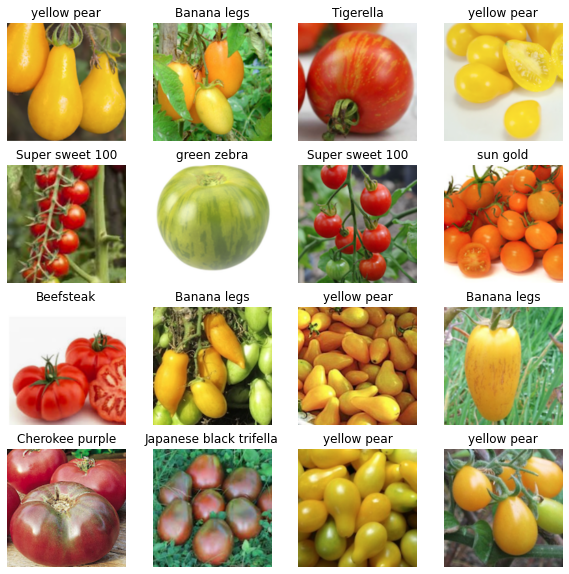

In [ ]:
## visualize train set images

plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    ## in order for the image to be displayed in its real color 
    rgb = cv2.cvtColor(train[i], cv2.COLOR_BGR2RGB)
    plt.imshow(rgb, cmap = plt.cm.Spectral)
    #
    label = y_train[i]
    name = names[str(label)]
    plt.title(name)
    plt.axis("off")

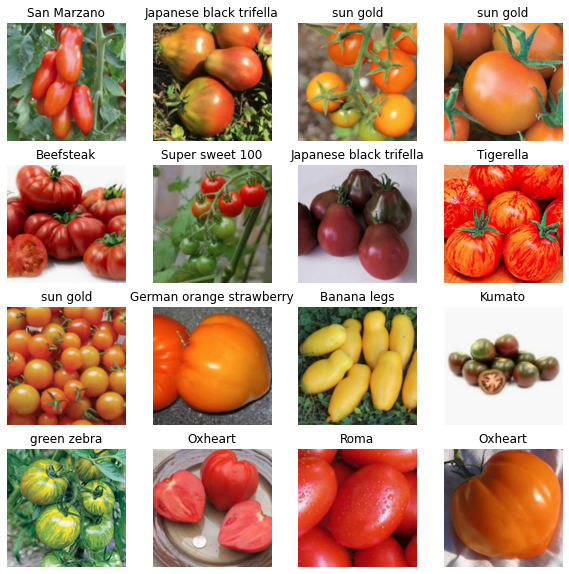

In [ ]:
## visualize validation set images

plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    ## in order for the image to be displayed in its real color 
    rgb = cv2.cvtColor(val[i], cv2.COLOR_BGR2RGB)
    plt.imshow(rgb, cmap = plt.cm.Spectral)
    #
    label = y_val[i]
    name = names[str(label)]
    plt.title(name)
    plt.axis("off")

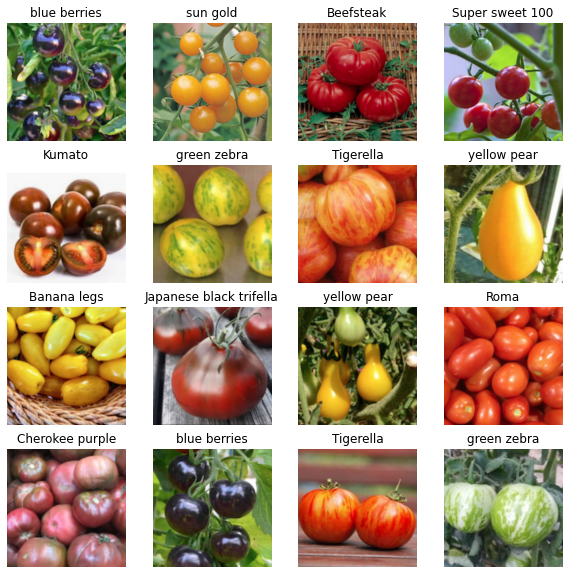

In [ ]:
## visualize test set images

plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    ## in order for the image to be displayed in its real color 
    rgb = cv2.cvtColor(test[i], cv2.COLOR_BGR2RGB)
    plt.imshow(rgb, cmap = plt.cm.Spectral)
    #
    label = y_test[i]
    name = names[str(label)]
    plt.title(name)
    plt.axis("off")

2022-01-12 11:01:47.224671: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-12 11:01:47.313423: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-12 11:01:47.314122: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-12 11:01:47.315285: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 15)                7695      
Total params: 14,722,383
Trainable params: 7,695
Non-trainable params: 14,714,688
_________________________________________________________________


2022-01-12 11:01:51.599198: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-12 11:01:53.183839: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


CPU times: user 21.5 s, sys: 2.31 s, total: 23.8 s
Wall time: 1min 18s
3/3 [==============================] - 2s 733ms/step - loss: 0.7725 - accuracy: 0.8846
Test image accuracy :0.8846153616905212


2022-01-12 11:03:12.429359: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


                          precision    recall  f1-score   support

                  Kumato       1.00      0.80      0.89         5
               Beefsteak       0.86      0.86      0.86         7
               Tigerella       0.86      1.00      0.92         6
                    Roma       0.80      0.80      0.80         5
 Japanese black trifella       0.60      0.75      0.67         4
             yellow pear       1.00      1.00      1.00         6
                sun gold       0.80      1.00      0.89         4
             green zebra       1.00      1.00      1.00         6
         Cherokee purple       1.00      0.75      0.86         4
                 Oxheart       0.50      0.25      0.33         4
            blue berries       1.00      1.00      1.00         5
             San Marzano       1.00      1.00      1.00         6
             Banana legs       1.00      1.00      1.00         6
German orange strawberry       0.80      1.00      0.89         4
         

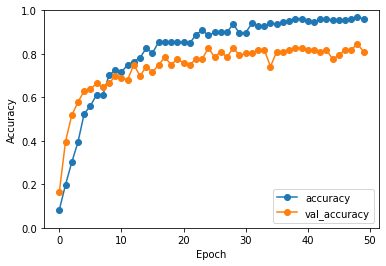

In [ ]:
# Transfer learning with VGG16 . 
base_Net = tf.keras.applications.VGG16(include_top = False, 
                         weights ='imagenet', 
                         input_shape = (224,224,3), 
                         pooling='avg',
                         )

base_Net.trainable = False
#Adding the final layers to the above base models where the actual classification is done in the dense layers
model_Net = tf.keras.models.Sequential()
model_Net.add(base_Net)
model_Net.add(tf.keras.layers.Dropout(0.2))
model_Net.add(tf.keras.layers.Dense(15, activation=tf.nn.softmax))

model_Net.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_Net.summary()

# Training the CNN on the Train data and evaluating it on the val data
%time history = model_Net.fit(train , y_train, validation_data = (val , y_val), epochs = 50, verbose = 0 )

##
test_loss, test_acc = model_Net.evaluate(test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model_Net.save('model_Net')
##
test_predicted = model_Net.predict(test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = [v for k,v in names.items()]))